In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Online_Shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#checking the shape and dtypes of the df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [14]:
#changing the dtype of weekend and revenue to object
df[['Weekend','Revenue']] = df[['Weekend','Revenue']].astype('str')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#checking the variation in feilds.
df.var()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19212/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Administrative             1.103425e+01
Administrative_Duration    3.125085e+04
Informational              1.613297e+00
Informational_Duration     1.981036e+04
ProductRelated             1.978070e+03
ProductRelated_Duration    3.662130e+06
BounceRates                2.351117e-03
ExitRates                  2.361624e-03
PageValues                 3.447868e+02
SpecialDay                 3.956808e-02
OperatingSystems           8.305129e-01
Browser                    2.949039e+00
Region                     5.767640e+00
TrafficType                1.620199e+01
Weekend                    1.785135e-01
Revenue                    1.308093e-01
dtype: float64

In [7]:
#Checking null values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<AxesSubplot:>

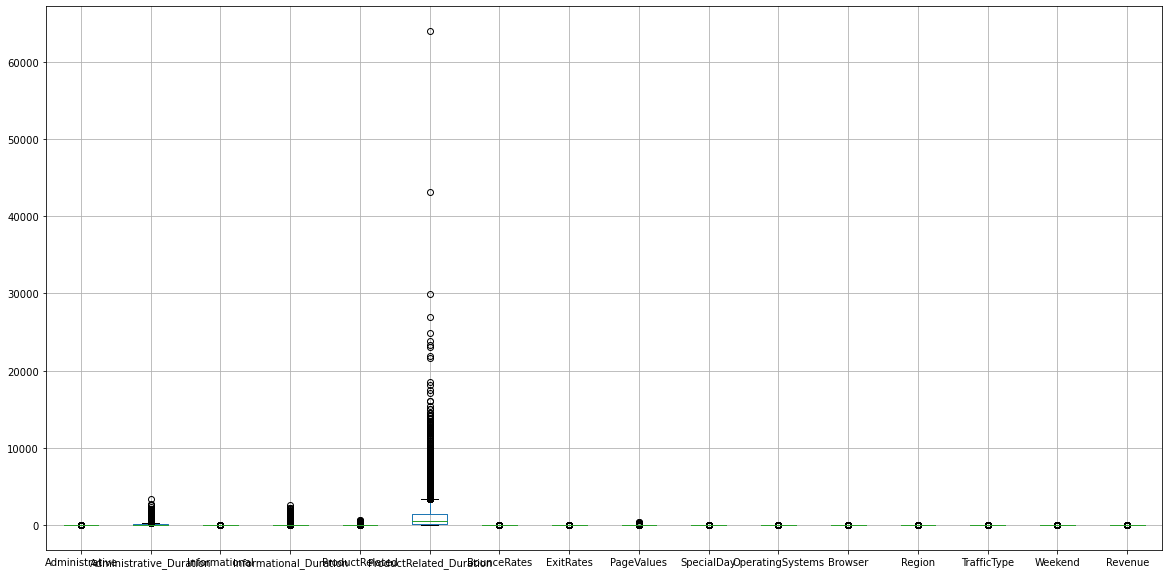

In [10]:
#checking for the outliers
df.boxplot(figsize=(20,10))

In [11]:
#shape before treatment
df.shape

(12330, 18)

In [16]:
#eliminating the outties
q1= df.quantile(.25)
q3= df.quantile(.75)
IQR = q3-q1
df = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19212/935990128.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]


In [34]:
#resetting the index
df.reset_index(drop=True,inplace=True)

In [18]:
#shape after outliers
df.shape

(2550, 18)

<AxesSubplot:>

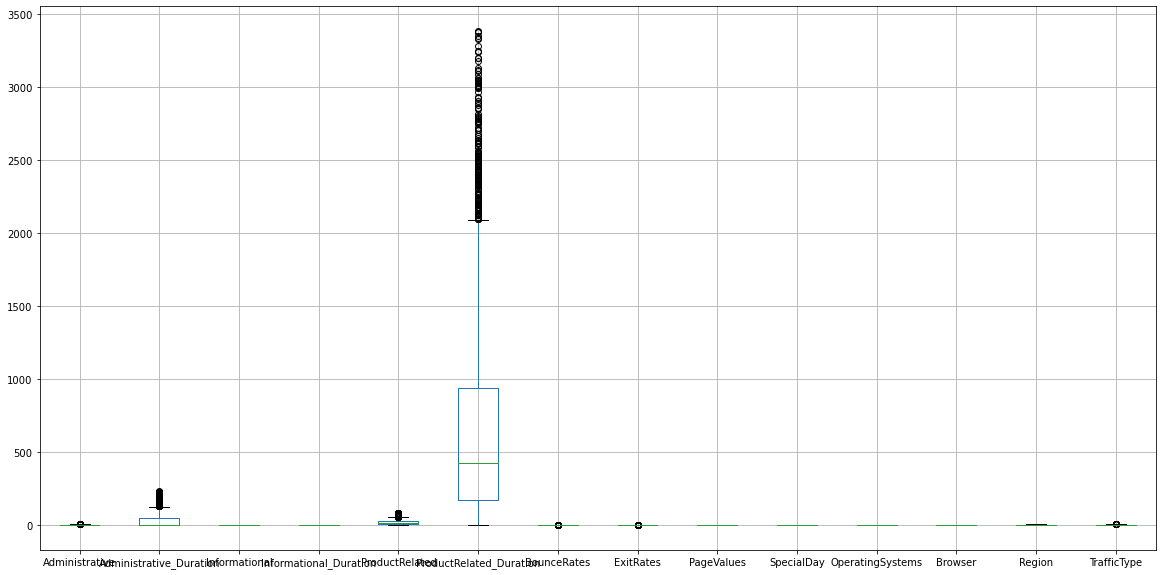

In [20]:
df.boxplot(figsize=(20,10))

In [27]:
#Encoding the categorical data
#checking the num of classes in object dtypes
df.select_dtypes('O')

,Month,VisitorType,Weekend,Revenue
1,Feb,Returning_Visitor,False,False
5,Feb,Returning_Visitor,False,False
14,Feb,Returning_Visitor,False,False
18,Feb,Returning_Visitor,False,False
22,Feb,Returning_Visitor,False,False
...,...,...,...,...
12309,Dec,Returning_Visitor,False,False
12310,Nov,Returning_Visitor,False,False
12320,Nov,Returning_Visitor,False,False
12322,Dec,Returning_Visitor,False,False


In [28]:
df.VisitorType.value_counts()

Returning_Visitor    2077
New_Visitor           467
Other                   6
Name: VisitorType, dtype: int64

In [30]:
#label encoding for month and dummies for others.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Month'] = lb.fit_transform(df['Month'])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_19212/3667369083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = lb.fit_transform(df['Month'])


In [36]:
df = pd.get_dummies(df,drop_first=True)

In [38]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,0,1,0,0
1,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,0,1,0,0
2,0,0.0,0,0.0,2,68.000000,0.000000,0.100000,0.0,0.0,2,3,2,3,3,0,1,0,0
3,0,0.0,0,0.0,2,32.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,3,0,1,0,0
4,0,0.0,0,0.0,3,105.000000,0.000000,0.033333,0.0,0.0,2,3,2,1,5,0,1,0,0


In [41]:
#scalling the df

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scale_df = ss.fit_transform(df)


In [46]:
df = pd.DataFrame(scale_df,columns=df.columns)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,-0.683305,-0.632354,0.0,0.0,-1.050685,-0.884441,-0.618519,2.974418,0.0,0.0,-1.234311,-0.496020,0.0,-0.920585,-0.293314,-0.048564,0.477213,-0.541996,-0.186822
1,-0.683305,-0.632354,0.0,0.0,-0.028943,-0.753431,0.890714,-0.300281,0.0,0.0,-1.234311,-0.496020,0.0,-0.920585,0.458395,-0.048564,0.477213,-0.541996,-0.186822
2,-0.683305,-0.632354,0.0,0.0,-1.050685,-0.878632,-0.618519,2.974418,0.0,0.0,-1.234311,1.227211,0.0,-0.012816,0.458395,-0.048564,0.477213,-0.541996,-0.186822
3,-0.683305,-0.632354,0.0,0.0,-1.050685,-0.930910,-0.618519,2.974418,0.0,0.0,-1.234311,-0.496020,0.0,-0.920585,0.458395,-0.048564,0.477213,-0.541996,-0.186822
4,-0.683305,-0.632354,0.0,0.0,-0.990583,-0.824902,-0.618519,0.080498,0.0,0.0,-1.234311,1.227211,0.0,-0.920585,1.961811,-0.048564,0.477213,-0.541996,-0.186822


In [47]:
#now start the clustering
from sklearn.cluster import KMeans,AgglomerativeClustering

In [94]:
#finding the best number of cluster
km = KMeans()
wcss=[]
for i in range(2,8):
    mod = KMeans(i)
    mod = mod.fit(df)
    wcss.append(mod.inertia_)
wcss

[31705.75192382122,
 29125.44388079567,
 26644.66807193495,
 24771.22652066898,
 22821.838512082784,
 21028.0994619307]

In [62]:
#plotting the values for the skree plot aka elbow plot
#wcss= list(zip(wcss,range(2,8)))


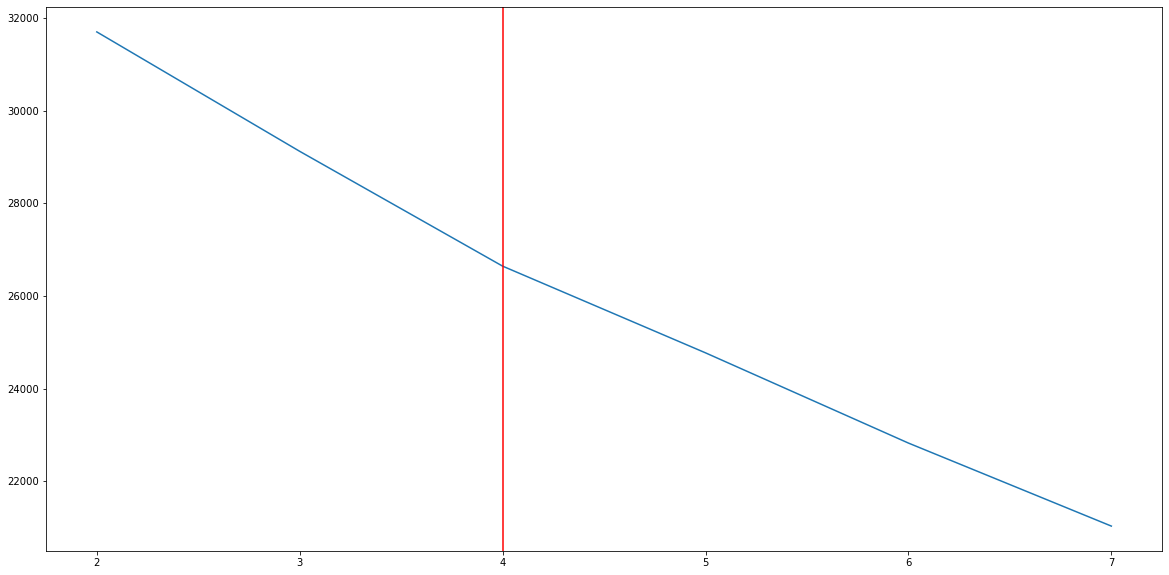

In [109]:
plt.figure(figsize=(20,10))
plt.plot(wcss)
plt.xticks(ticks=np.arange(0, 6, step=1),labels=['2','3','4','5','6','7'])
plt.axvline(x=2,color='red')

In [110]:
#4 is the optimum no of cluster lets roll the model
km = KMeans(n_clusters=4)
mod_k =km.fit(df)

In [111]:
mod_k.cluster_centers_

array([[ 1.20013007,  1.2226353 ,  0.        ,  0.        , -0.0889505 ,
        -0.19577392, -0.34843527, -0.59041463,  0.        ,  0.        ,
         0.11467351, -0.03922724,  0.        ,  0.04410012,  0.22691617,
        -0.04856429, -0.76830678,  0.10591185,  0.08575623,  0.9968254 ],
       [-0.36333626, -0.35180615,  0.        ,  0.        , -0.18748708,
        -0.15262648,  1.86848614,  0.83998883,  0.        ,  0.        ,
        -0.11690267,  0.17756888,  0.        ,  0.1406562 , -0.10403453,
        -0.04856429,  0.42168688,  0.02470872, -0.1204015 ,  0.04076739],
       [-0.54532136, -0.54380721,  0.        ,  0.        , -0.4813798 ,
        -0.456256  , -0.48809387,  0.18877069,  0.        ,  0.        ,
        -0.06328755,  0.00260349,  0.        , -0.06485329, -0.02724035,
         0.06411901,  0.1775704 , -0.05546778, -0.05576958,  0.01819836],
       [-0.01302611, -0.06414097,  0.        ,  0.        ,  1.64172604,
         1.70398059, -0.05749835, -0.45983444,  

In [112]:
df['Clusterk']=mod_k.labels_

In [113]:
df.Clusterk.value_counts()

2    1099
0     630
1     417
3     404
Name: Clusterk, dtype: int64

In [76]:
#lets bring some eda in

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 2550 non-null   float64
 1   Administrative_Duration        2550 non-null   float64
 2   Informational                  2550 non-null   float64
 3   Informational_Duration         2550 non-null   float64
 4   ProductRelated                 2550 non-null   float64
 5   ProductRelated_Duration        2550 non-null   float64
 6   BounceRates                    2550 non-null   float64
 7   ExitRates                      2550 non-null   float64
 8   PageValues                     2550 non-null   float64
 9   SpecialDay                     2550 non-null   float64
 10  Month                          2550 non-null   float64
 11  OperatingSystems               2550 non-null   float64
 12  Browser                        2550 non-null   f

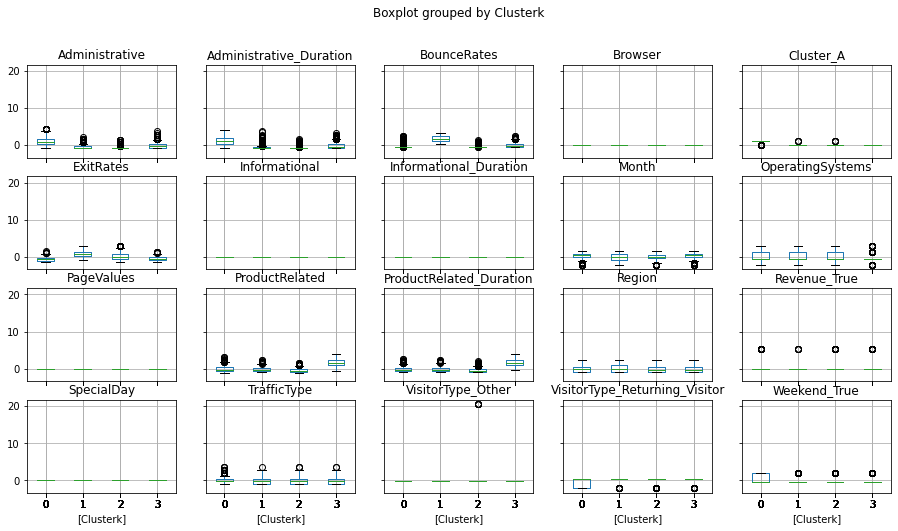

In [130]:
import seaborn as sns
df.boxplot(by = "Clusterk", layout=(5,5), figsize=(15,10))
plt.show()

In [87]:
#lets do AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram , cophenet, linkage

In [92]:
link_mat = linkage(df,method='ward')

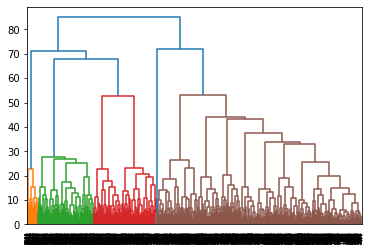

In [93]:
dendrogram(link_mat)
plt.show()

In [131]:
#5 clusters
agm = AgglomerativeClustering(n_clusters=5)
mod_a = agm.fit(df)

In [132]:
df['Cluster_A']= mod_a.labels_

In [133]:
df['Cluster_A'].value_counts()

0    1528
1     586
3     344
2      86
4       6
Name: Cluster_A, dtype: int64

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='ExitRates'>

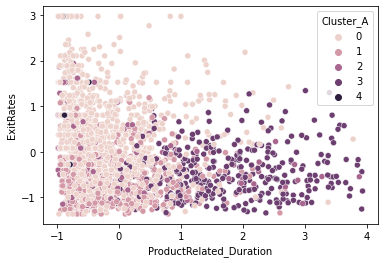

In [136]:
sns.scatterplot(x= df.ProductRelated_Duration , y =df.ExitRates, hue= df.Cluster_A)

In [144]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist

In [146]:
coeff, cophenet_dist = cophenet(link_mat,pdist(df))
coeff

#cluster dendro is not well saperated

0.44922409765219057

In [147]:
#lets do DBScan and see what happens

from sklearn.cluster import DBSCAN
db= DBSCAN()

In [148]:
mod_db =  db.fit(df)

In [149]:
df['Cluster_db']=mod_db.labels_

In [152]:
df['Cluster_db'].value_counts()

-1    2474
 3      21
 4      11
 5      10
 2       9
 6       7
 7       7
 1       6
 0       5
Name: Cluster_db, dtype: int64

In [ ]:
#dbscan failed miserably 
#lets do PCA and try the clustering.

In [153]:
cov_mat = np.cov(df.T) #covariance of transpose of scalled data

In [154]:
eigenvalue,eigenvector = np.linalg.eig(cov_mat)
eigenvalue_list = eigenvalue.tolist()

In [155]:
cumm_var = []
for i in eigenvalue:
    var = i/sum(eigenvalue_list)*100
    cumm_var.append(var)
cumm_var.sort(reverse=True)

In [159]:
cumm_var

[17.373611513404583,
 15.070590385182465,
 8.36171942790067,
 6.837567109088279,
 6.532682606322934,
 6.355229266174164,
 6.041140578557489,
 5.8497311809414905,
 5.418667230132102,
 5.225482413519983,
 4.398922568942653,
 3.5643372385013397,
 3.1944935225928375,
 1.6365214222435527,
 1.519647572209927,
 1.3748097575967688,
 1.244846206688764,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [160]:
#top 10 explains 80% perc of var
eig_vec_10= eigenvector[:,0:10]
df_new= np.dot(df,eig_vec_10)
df_PCA= pd.DataFrame(df_new, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.184741,1.701007,-0.131225,0.210311,0.373831,0.308776,0.322186,-2.866932,-0.753936,-0.686385
1,-0.686920,1.606279,0.014679,0.430603,1.277150,0.339460,1.104458,0.013547,-1.148612,0.257299
2,-2.247971,1.496762,0.195665,0.133315,0.309657,0.352255,0.327373,-2.951024,-0.218029,-1.045473
3,-2.208683,1.576450,-0.189847,0.235373,0.372062,0.319680,0.367398,-2.813298,-0.659634,-0.788912
4,-1.210427,1.006502,-0.879326,0.001199,0.922592,-0.076718,0.900959,-0.963137,-0.856039,-0.757201


In [163]:
link_mat_pc = linkage(df_PCA,method='ward')

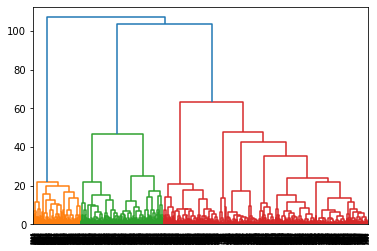

In [164]:
dendrogram(link_mat_pc)
plt.show()

In [165]:
#n = 3, lets make the model

ag_m =AgglomerativeClustering(n_clusters=3)
mod_agg_pc= ag_m.fit(df_PCA)

In [166]:
df_PCA['Cluster_agg_pc'] = mod_agg_pc.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

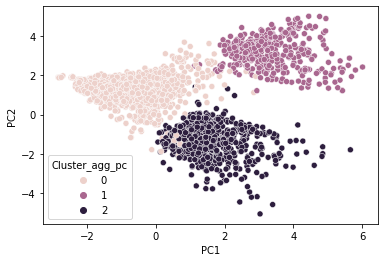

In [167]:
sns.scatterplot(df_PCA['PC1'],df_PCA['PC2'],hue= df_PCA['Cluster_agg_pc'])

In [169]:
#gives a good out put and pure clusters lets check the cophenet score

coeff, dist = cophenet(link_mat_pc,pdist(df_PCA))
coeff

0.742236031416001

In [170]:
#cluster is well defined and the distinction has increased.
#lets try DBScan now

db = DBSCAN()
mod_db_pc = db.fit(df_PCA)

In [171]:
df_PCA['Cluster_db_pc']= mod_db_pc.labels_

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

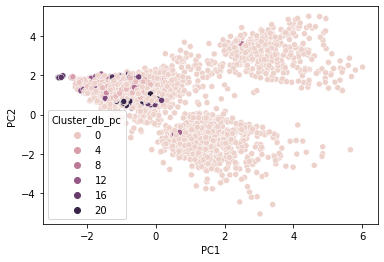

In [172]:
sns.scatterplot(df_PCA['PC1'],df_PCA['PC2'],hue= df_PCA['Cluster_db_pc'])

In [ ]:
#comparision , agg clustering performs better in this case over dbscan

In [ ]:
#thank you||